<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## **K-Means Clustering**

Enter the number of clusters (K): 3
Converged!


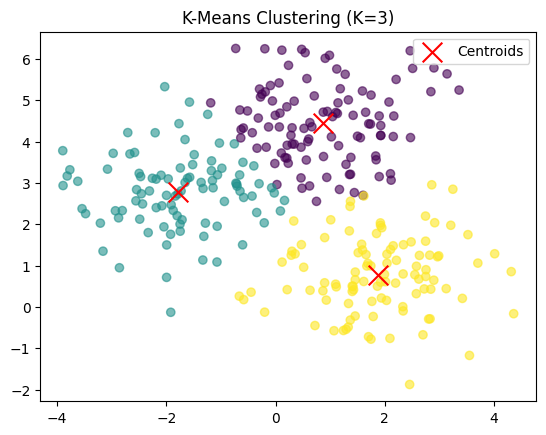

In [ ]:
K = int(input("Enter the number of clusters (K): "))
seed = 0

X, _ = make_blobs(n_samples=300, centers=K, cluster_std=1.0, random_state=seed)

np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
convergence_history = []

max_iters = 100
tolerance = 1e-4

for _ in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(K)])

    centroid_shift = np.linalg.norm(centroids - new_centroids)
    convergence_history.append(centroid_shift)

    if centroid_shift < tolerance:
        print("Converged!")
        break

    centroids = new_centroids

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title(f"K-Means Clustering (K={K})")
plt.show()

## Plotting Convergence History

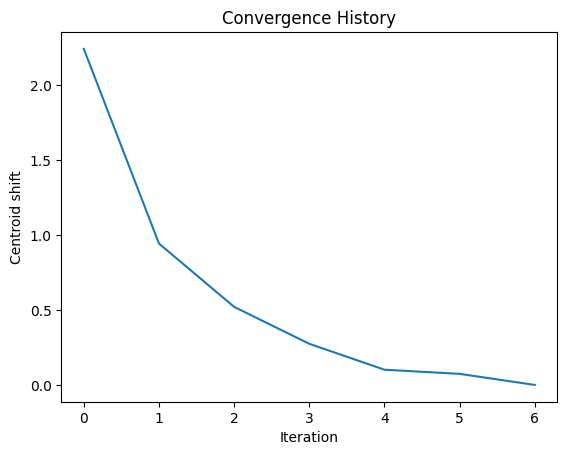

In [ ]:
plt.plot(convergence_history)
plt.xlabel('Iteration')
plt.ylabel('Centroid shift')
plt.title('Convergence History')
plt.show()

## Showing cluster regions

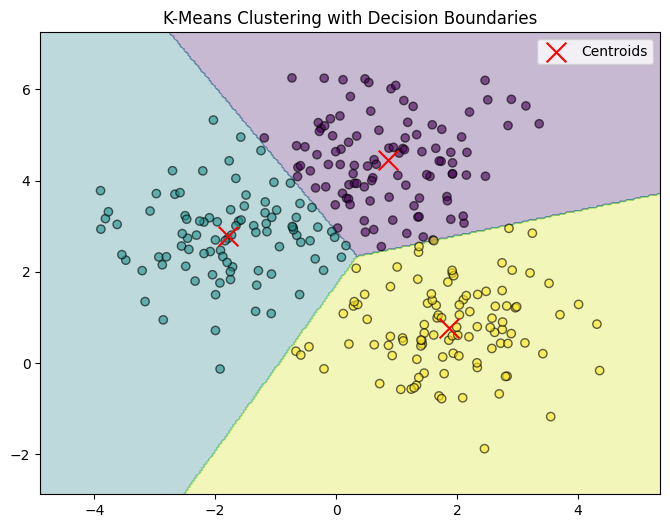

In [ ]:
import seaborn as sns

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict cluster for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
distances = np.linalg.norm(grid_points[:, np.newaxis] - centroids, axis=2)
grid_labels = np.argmin(distances, axis=1).reshape(xx.shape)

# Plot decision boundaries and clusters
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_labels, cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title("K-Means Clustering with Decision Boundaries")
plt.show()

## Displaying centriods

In [ ]:
# print centroids
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroids:
Cluster 1: [0.86099822 4.45681748]
Cluster 2: [-1.78246565  2.78528143]
Cluster 3: [1.86930473 0.78120157]


## **Using Built-in function**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
labels = kmeans.labels_

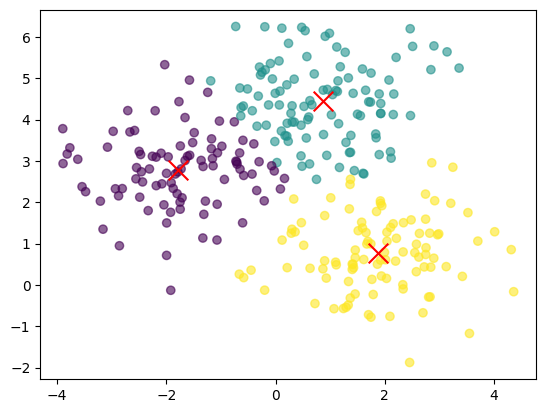

In [ ]:
# plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')

## Comparing results

In [ ]:
# comparing results of builtin and our own function
print("Centroids of built in function:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i+1}: {centroid}")
print()
print("Centroids of our own function:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")

Centroids of built in function:
Cluster 1: [-1.78246565  2.78528143]
Cluster 2: [0.86819253 4.43996047]
Cluster 3: [1.87178417 0.76251893]

Centroids of our own function:
Cluster 1: [0.86099822 4.45681748]
Cluster 2: [-1.78246565  2.78528143]
Cluster 3: [1.86930473 0.78120157]
